In [58]:
%pylab inline

import random
import numpy as np
import matplotlib.pyplot as plt
from numba import *
from tqdm.auto import tqdm

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/kamil/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['short', 'uint32', 'byte', 'int_', 'char', 'longlong', 'bool_', 'double', 'int8', 'complex64', 'uint8', 'uintp', 'uint64', 'float32', 'random', 'void', 'int16', 'float_', 'intp', 'uintc', 'float64', 'vectorize', 'intc', 'complex128', 'ulonglong', 'int32', 'uint16', 'ushort', 'uint', 'int64']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [59]:
kroA100 = [1380, 939, 2848, 96, 3510, 1671, 457, 334, 3888, 666, 984, 965, 2721, 1482, 1286, 525, 2716, 1432, 738, 1325, 1251, 1832, 2728, 1698, 3815, 169, 3683, 1533, 1247, 1945, 123, 862, 1234, 1946, 252, 1240, 611, 673, 2576, 1676, 928, 1700, 53, 857, 1807, 1711, 274, 1420, 2574, 946, 178, 24, 2678, 1825, 1795, 962, 3384, 1498, 3520, 1079, 1256, 61, 1424, 1728, 3913, 192, 3085, 1528, 2573, 1969, 463, 1670, 3875, 598, 298, 1513, 3479, 821, 2542, 236, 3955, 1743, 1323, 280, 3447, 1830, 2936, 337, 1621, 1830, 3373, 1646, 1393, 1368, 3874, 1318, 938, 955, 3022, 474, 2482, 1183, 3854, 923, 376, 825, 2519, 135, 2945, 1622, 953, 268, 2628, 1479, 2097, 981, 890, 1846, 2139, 1806, 2421, 1007, 2290, 1810, 1115, 1052, 2588, 302, 327, 265, 241, 341, 1917, 687, 2991, 792, 2573, 599, 19, 674, 3911, 1673, 872, 1559, 2863, 558, 929, 1766, 839, 620, 3893, 102, 2178, 1619, 3822, 899, 378, 1048, 1178, 100, 2599, 901, 3416, 143, 2961, 1605, 611, 1384, 3113, 885, 2597, 1830, 2586, 1286, 161, 906, 1429, 134, 742, 1025, 1625, 1651, 1187, 706, 1787, 1009, 22, 987, 3640, 43, 3756, 882, 776, 392, 1724, 1642, 198, 1810, 3950, 1558]
kroA100 = np.reshape(kroA100, (-1,2))


kroB100 = [3140, 1401, 556, 1056, 3675, 1522, 1182, 1853, 3595, 111, 962, 1895, 2030, 1186, 3507, 1851, 2642, 1269, 3438, 901, 3858, 1472, 2937, 1568, 376, 1018, 839, 1355, 706, 1925, 749, 920, 298, 615, 694, 552, 387, 190, 2801, 695, 3133, 1143, 1517, 266, 1538, 224, 844, 520, 2639, 1239, 3123, 217, 2489, 1520, 3834, 1827, 3417, 1808, 2938, 543, 71, 1323, 3245, 1828, 731, 1741, 2312, 1270, 2426, 1851, 380, 478, 2310, 635, 2830, 775, 3829, 513, 3684, 445, 171, 514, 627, 1261, 1490, 1123, 61, 81, 422, 542, 2698, 1221, 2372, 127, 177, 1390, 3084, 748, 1213, 910, 3, 1817, 1782, 995, 3896, 742, 1829, 812, 1286, 550, 3017, 108, 2132, 1432, 2000, 1110, 3317, 1966, 1729, 1498, 2408, 1747, 3292, 152, 193, 1210, 782, 1462, 2503, 352, 1697, 1924, 3821, 147, 3370, 791, 3162, 367, 3938, 516, 2741, 1583, 2330, 741, 3918, 1088, 1794, 1589, 2929, 485, 3453, 1998, 896, 705, 399, 850, 2614, 195, 2800, 653, 2630, 20, 563, 1513, 1090, 1652, 2009, 1163, 3876, 1165, 3084, 774, 1526, 1612, 1612, 328, 1423, 1322, 3058, 1276, 3782, 1865, 347, 252, 3904, 1444, 2191, 1579, 3220, 1454, 468, 319, 3611, 1968, 3114, 1629, 3515, 1892, 3060, 155]
kroB100 = np.reshape(kroB100, (-1, 2))

In [60]:
@jit(nopython=True)
def random_individual(length):
    return np.random.permutation(length)

@jit(nopython=True)
def distance(a,b):
    # print(np.sqrt(np.sum((a-b)**2)))
    return np.sqrt(np.sum((a-b)**2))

@jit(nopython=True)
def route_length(route, coords):
    # print(route)
    res = distance(coords[route[-1]], coords[route[0]])
    # print(route[-1])
    for i in range(len(route)-1):
        res += distance(coords[route[i]], coords[route[i+1]])

    return res

@jit(nopython=True)
def route_length_sum(route, mo_coords):
    res = 0
    for coords in mo_coords:
        res += route_length(route, coords)

    return res

@jit(nopython=True)
def route_length_weighted_sum(route, mo_coords, weights):
    res = 0
    for i, coords in enumerate(mo_coords):
        res += weights[i] * route_length(route, coords)
    return res

# @jit(nopython=True)
def random_population(N, length):
    return np.array([random_individual(length) for _ in range(N)])

# @jit(nopython=True)
@jit(nopython=True)
def population_evaluation(P, mo_coords):
    A = mo_coords[0]
    B = mo_coords[1]
    res = np.zeros((len(P), 2))
    n = len(P)
    for i in range(n):
        res[i,:] = np.array([route_length(P[i], A), route_length(P[i], B)])
    return res


In [61]:
#order_1 crossover
@jit(nopython=True)
def OX(ind1, ind2):
    n = len(ind1)

    p = np.random.randint(0,n)
    q = np.random.randint(p+1, n+1)

    def _offspring(par1, par2):
        res = (np.zeros(n)-1).astype(np.int64)
        cut = par1[p:q]
        res[p:q] = cut
        cut_set = set(cut)
        i = q%n
        for val in np.concatenate((par2[q:], par2[:q])):
            if val not in cut_set:
                res[i] = val
                i = (i+1)%n        
        return res

    return _offspring(ind1, ind2), _offspring(ind2, ind1)


@jit(nopython=True)
def PMX(ind1, ind2):
    l = len(ind1)

    p = np.random.randint(0,l)
    q = np.random.randint(p, l+1)


    child1 = ind1.copy()
    child2 = ind2.copy()

    cut1 = ind1[p:q].copy()
    cut2 = ind2[p:q].copy()

    child1[p:q] = cut2
    child2[p:q] = cut1


    swap1 = np.zeros(l) - 1
    swap2 = np.zeros(l) - 1

    swap1[cut2] = cut1
    swap2[cut1] = cut2

    for i in range(l):
        if (not (p <= i < q)):
            while swap1[child1[i]] >= 0:
                child1[i] = swap1[child1[i]]

            while swap2[child2[i]] >= 0:
                child2[i] = swap2[child2[i]]

    return child1, child2

# cycle crossover
@jit(nopython=True)
def CX(ind1, ind2):
    n = len(ind1)
    
    map1 = (np.zeros(n) - 1).astype(np.int64)
    map2 = (np.zeros(n) - 1).astype(np.int64)

    for i in range(n):
        map1[ind1[i]] = i
        map2[ind2[i]] = i

    off1 = (np.zeros(n) - 1).astype(np.int64)
    off2 = (np.zeros(n) - 1).astype(np.int64)

    def cycle_from(i):
        off1[i] = ind1[i]
        off2[i] = ind2[i]

        j = map1[ind2[i]]

        while j != i:
            off1[j] = ind1[j]
            off2[j] = ind2[j]

            j = map1[ind2[j]]


    for i in range(n):
        if (off1[i] == -1):
            cycle_from(i)
            ind1, ind2 = ind2, ind1
            map1, map2 = map2, map1

    return off1, off2

@jit(nopython=True)
def PBX(ind1, ind2):
    n = len(ind1)
    prob = np.random.rand()
    random_probs = np.random.rand(n)

    def offspring(par1, par2):
        res = (np.zeros(n) - 1).astype(np.int64)

        cut_set = set()

        for i in range(n):
            if random_probs[i] < prob:
                res[i] = par1[i]
                cut_set.add(par1[i])

        j = 0

        for val in par2:
            if val not in cut_set:
                while res[j] >= 0:
                    j += 1
                res[j] = val

        return res


    return offspring(ind1, ind2), offspring(ind2, ind1)

In [62]:
@jit(nopython=True)
def random_weights(n = 2):
    r = np.random.rand()
    return np.array([r, 1-r])        

@jit(nopython=True)
def opt_2_swap(route, i, j):
    swap = np.zeros(l).astype(np.int64)
    swap[:i] = route[:i]
    swap[i:j] = route[i:j][::-1]
    swap[j:] = route[j:]
    return new_route

@jit(nopython=True)
def opt_2_best_swap(route, mo_coords, weights):
    best_route = route
    best_length = route_length_weighted_sum(route, mo_coords, weights)

    l = len(route)
    for i in range(l):
        for j in range(i+1, l + 1):
            swap = opt_2_swap(route, i, j)
            swap_length = route_length_weighted_sum(swap, mo_coords, weights)

            if (swap_length < best_length):
                best_route = swap
                best_length = swap_length

    return best_route, best_length


@jit(nopython=True)
def opt_2_local_search(route, mo_coords, weights):
    best_route = route
    best_length = route_length_weighted_sum(route, mo_coords, weights)
    while True:
        best_swap, swap_length = opt_2_best_swap(best_route, mo_coords, weights)
        if swap_length >= best_length:
            return best_route

        best_route = best_swap
        best_length = swap_length

# @jit(nopython=True)
def population_random_opt_2(P, mo_coords):
    for i in tqdm(range(len(P))):
        weights = random_weights(len(mo_coords))

        P[i] = opt_2_local_search(P[i], mo_coords, weights)

    return P


def mo_genetic_local_search(mo_coords, N, iterations, K = 10, crossover = OX):
    length = len(mo_coords[0])
    P = random_population(N, length)
    P = population_random_opt_2(P, mo_coords)


    P_score = population_evaluation(P, mo_coords)

    P_scores_mins = [np.min(P_score, axis=0)]

    offsprings = []

    for t in tqdm(range(iterations)):
        weights = random_weights()

        P_score_weighted = np.sum(P_score * weights, axis=1)

        sorted_indices = np.argsort(P_score_weighted)
        best_indices = sorted_indices[:K]

        (par1_ind, par2_ind) = np.random.choice(best_indices, size=2, replace=False)


        for c in crossover(P[par1_ind], P[par2_ind]):
            child = opt_2_local_search(route=c, mo_coords=mo_coords, weights=weights)

            child_weighted_score = route_length_weighted_sum(child, mo_coords, weights)
            child_score = np.array([route_length(child, coords) for coords in mo_coords])

            offsprings.append(child)

            if child_weighted_score < P_score_weighted[sorted_indices[-1]]:
                P = np.vstack((P, child))
                P_score = np.vstack((P_score, child_score))

            P_scores_mins.append(np.min(P_score, axis=0))

    return P, P_score, P_scores_mins, offsprings

In [72]:
@jit(nopython=True)
def domination_test(a,b):
    return (a <= b).all() and (a < b).any()

@jit(nopython=True)
def non_dominated_sort(score):
    n = len(score)

    dominated_count = np.zeros(n)
    dominates = np.zeros((n,n))
    # nexts = np.zeros((n,n))
    rank = np.zeros(n)

    for i in range(n):
        for j in range(n):
            if domination_test(score[i], score[j]):
                dominated_count[j] += 1
                dominates[i,j] = 1

    sort_count = 0
    result = []

    while sort_count < n:

        current_front = (dominated_count == 0).nonzero()[0]

        sort_count += len(current_front)
        dominated_count[current_front] = -1
        result.append(current_front)

        # for i in current_front:
        rank[current_front] = len(result)-1
        dominated_count -= np.sum(dominates[current_front], axis=0)

    return result, rank

In [65]:
# Uruchomione testy, każdy liczy się 10-20 minut

ab = np.array([kroA100, kroB100])
OX_P, OX_P_score, OX_P_mins, OX_offsprings = mo_genetic_local_search(ab, 50, 200, K=15)

PMX_P, PMX_P_score, PMX_P_mins, PMX_offsprings = mo_genetic_local_search(ab, 50, 200, K=15, crossover=PMX)
np.save(f"results/MOGLS/PMX-score.npy", PMX_P_score)

CX_P, CX_P_score, CX_P_mins, CX_offsprings = mo_genetic_local_search(ab, 50, 200, K=15, crossover=CX)
np.save(f"results/MOGLS/CX-score.npy", CX_P_score)

PBX_P, PBX_P_score, PBX_P_mins, PBX_offsprings = mo_genetic_local_search(ab, 50, 200, K=15, crossover=PBX)
np.save(f"results/MOGLS/PBX-score.npy", PBX_P_score)

100%|██████████| 200/200 [15:14<00:00,  4.57s/it]


[22046.34849525 22949.719405  ]
[22454.77568698 22490.00273834]
[21991.22180827 23288.3803491 ]
[21863.7585224 22910.7274379]


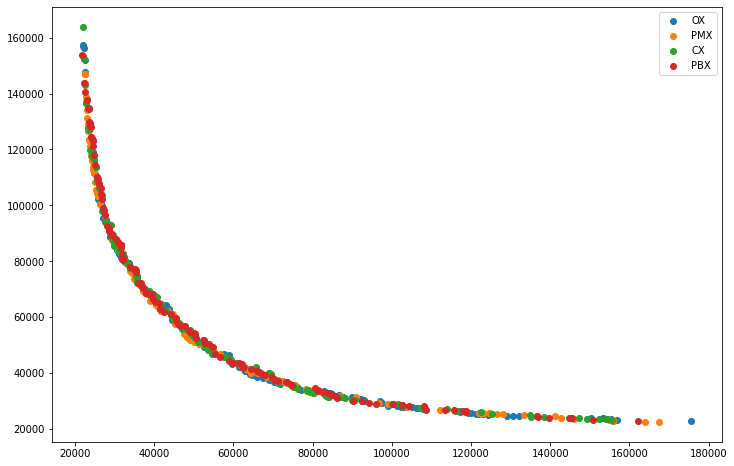

In [74]:
print(np.min(OX_P_score, axis=0))
print(np.min(PMX_P_score, axis=0))
print(np.min(CX_P_score, axis=0))
print(np.min(PBX_P_score, axis=0))


plt.figure(figsize=(12, 8))

# plt.grid()
for label, scores in [("OX", OX_P_score), ("PMX", PMX_P_score), ("CX", CX_P_score), ("PBX", PBX_P_score)]:
    fronts, _ = non_dominated_sort(scores)
    best_solutions = scores[fronts[0]]
    plt.scatter(best_solutions[:, 0], best_solutions[:, 1], label=label)

# # plt.title("Najlepsze rozwiązania")
plt.legend()
plt.show()

100%|██████████| 200/200 [03:18<00:00,  1.01it/s]


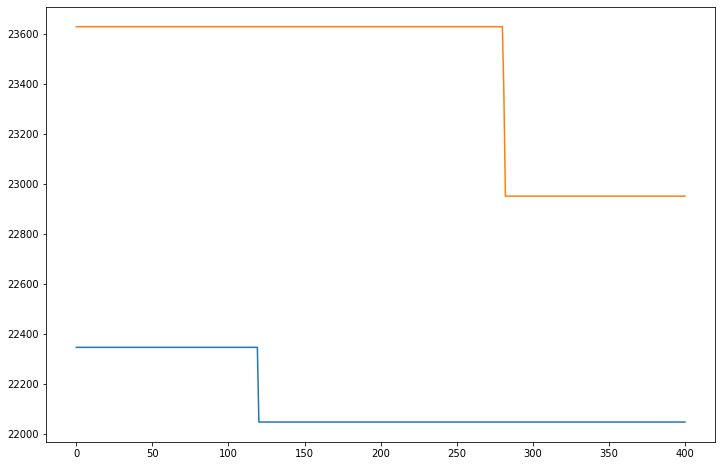

[22046.34849525 22949.719405  ]


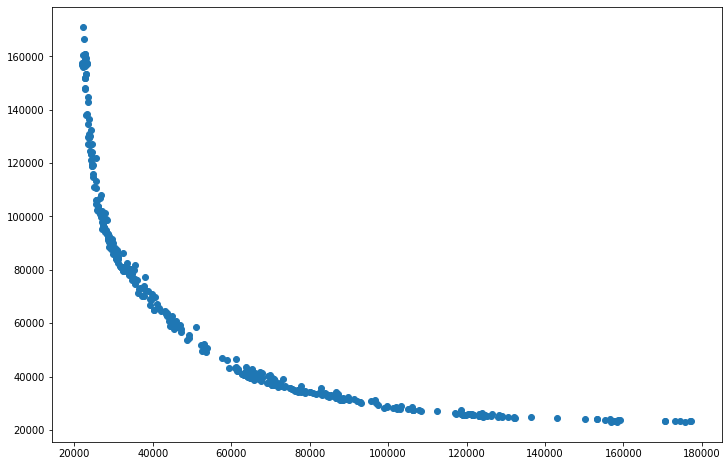

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(OX_P_mins)
plt.show()

print(np.min(OX_P_score, axis=0))

plt.figure(figsize=(12, 8))
plt.scatter(OX_P_score[:,0], OX_P_score[:,1])
plt.show()